# Introducción al Aprendizaje Automatizado: Trabajo Práctico N° 3
## Natalia Mellino

In [64]:
# imports

from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")

In [60]:
# Función para entrenar y devolver el mejor clasificador

n_vecinos = [2, 4, 8, 16, 32]

def get_best_clf(x_train, y_train, x_test, y_test, x_val, y_val):
    errores_train = []
    errores_test = []
    errores_val = []
    best_e = None
    best_clf = None
    

    for n in n_vecinos:    
        clf = KNeighborsClassifier(n_neighbors=n)
        clf.fit(x_train, y_train)
        y_pred = clf.predict(x_test)
        y_pred_train = clf.predict(x_train)
        y_pred_val = clf.predict(x_val)

        e_train = 1 - accuracy_score(y_train, y_pred_train)
        e_test = 1 - accuracy_score(y_test, y_pred)
        e_val = 1 - accuracy_score(y_val, y_pred_val)

        errores_test.append(e_test)
        errores_train.append(e_train)
        errores_val.append(e_val)

        if best_e is None or e_val < best_e:
            best_e = e_test
            best_clf = clf

    return errores_train, errores_val, errores_test, best_clf

In [74]:
def graficar_predicciones(x, y, cl, title=''):
    scatter = plt.scatter(x, y, c=cl)
    plt.legend(*scatter.legend_elements())
    plt.title(title)
    plt.show()

def graficar_errores(x, et, ev, ett, title=''):
    plt.plot(x, et, label='Train')
    plt.plot(x, ev, label='Validacion')
    plt.plot(x, ett, label='Test')
    plt.title(title)
    plt.legend()
    plt.show()

## Ejercicio 1

In [83]:
def ej1():
    cols_0 = ['x', 'y', 'Class']
    cols_2 = ['x', 'y', 'z', 'w', 'Class']
    train = pd.read_csv('espirales_con_ruido/c_0.data', names=cols_0)
    ntrain = pd.read_csv('espirales_con_ruido/c_2.data', names=cols_2)
    test = pd.read_csv('espirales_con_ruido/c_0.test', names=cols_0)
    ntest = pd.read_csv('espirales_con_ruido/c_2.test', names=cols_2)

    x_train, x_val, y_train, y_val = train_test_split(
        train.loc[ : , ['x', 'y'] ], 
        train.loc[ : , ['Class'] ], 
        test_size=0.2, 
        random_state=0
    )

    x_ntrain, x_nval, y_ntrain, y_nval = train_test_split(
        ntrain.loc[ : , ['x', 'y', 'z', 'w'] ], 
        ntrain.loc[ : , ['Class'] ], 
        test_size=0.2, 
        random_state=0
    )

    ### PARA DATOS SIN RUIDO

    et, ev, ett, clf = get_best_clf(x_train, y_train, test.loc[:, ['x', 'y']], test.loc[:, ['Class']], x_val, y_val)
    y_pred = clf.predict(test.loc[:, ['x', 'y']])

    # Errores
    graficar_errores(n_vecinos, et, ev, ett, 'Error sin ruido')
    # Predicciones
    graficar_predicciones(test.loc[:, ['x']], test.loc[:, ['y']], y_pred, 'Predicciones sin ruido')

    ### PARA DATOS CON RUIDO

    net, nev, nett, nclf = get_best_clf(x_ntrain, y_ntrain, ntest.loc[:, ['x', 'y', 'z', 'w']], ntest.loc[:, ['Class']], x_nval, y_nval)
    y_npred = nclf.predict(ntest.loc[:, ['x', 'y', 'z', 'w']])

    # Errores
    graficar_errores(n_vecinos, net, nev, nett, 'Error con ruido')
    # Predicciones
    graficar_predicciones(ntest.loc[:, ['x']], ntest.loc[:, ['y']], y_npred, 'Predicciones con ruido')
    

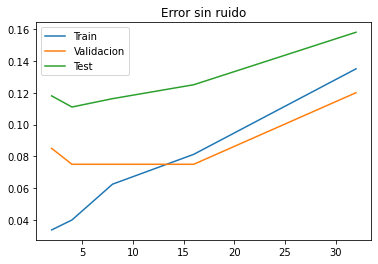

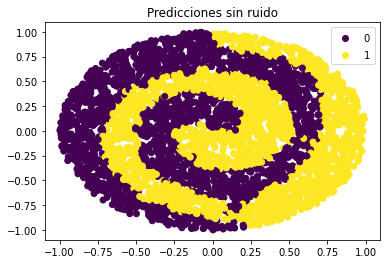

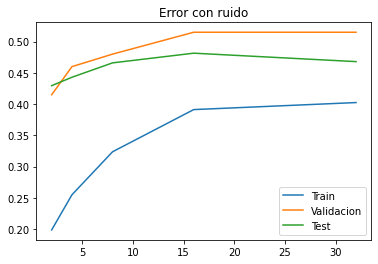

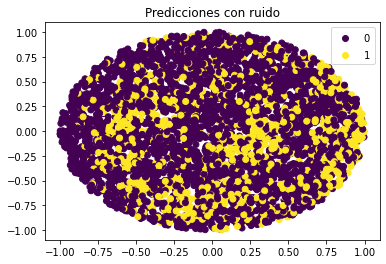

In [84]:
ej1()